In [1]:
import random
random.seed(53)

In [2]:
import pandas as pd
data=pd.read_csv("C:\\Users\\Shawaf Khan\\Desktop\\tweet_data.csv",index_col=0)

In [3]:
import numpy as np
print(data.isnull().sum())

id        0
author    0
status    0
dtype: int64


In [4]:
print(data.head())
y=data["author"]

   id           author                                             status
0   1  Donald J. Trump  I will be making a major statement from the @W...
1   2  Donald J. Trump  Just arrived at #ASEAN50 in the Philippines fo...
2   3  Donald J. Trump  After my tour of Asia, all Countries dealing w...
3   4  Donald J. Trump  Great to see @RandPaul looking well and back o...
4   5  Donald J. Trump  Excited to be heading home to see the House pa...


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data["status"],y,random_state=53,test_size=0.33)
X_train.head()


357    Canadians send their condolences to those affe...
256    We’re making progress on the TPP – and working...
175    Ed Gillespie will turn the really bad Virginia...
228    Nous sommes arrivés aux Philippines pour assis...
152    Today is National Prescription Drug Take Back ...
Name: status, dtype: object

In [6]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
countvectorizer=CountVectorizer(stop_words='english',max_df=0.9,min_df=0.05)
count_train=countvectorizer.fit_transform(X_train)
count_test=countvectorizer.transform(X_test)
print(count_train)



  (0, 14)	1
  (1, 0)	1
  (1, 5)	1
  (2, 4)	1
  (3, 5)	1
  (3, 9)	1
  (3, 10)	2
  (3, 7)	1
  (4, 14)	1
  (4, 5)	1
  (7, 14)	1
  (7, 5)	1
  (8, 4)	1
  (9, 10)	1
  (9, 7)	1
  (9, 12)	1
  (9, 2)	2
  (9, 1)	1
  (9, 8)	1
  (9, 6)	1
  (10, 5)	1
  (12, 0)	1
  (12, 5)	1
  (13, 15)	1
  (16, 9)	1
  :	:
  (257, 11)	1
  (258, 5)	1
  (258, 7)	2
  (258, 12)	1
  (258, 6)	2
  (259, 5)	1
  (259, 2)	1
  (259, 6)	1
  (260, 0)	1
  (260, 5)	1
  (261, 0)	1
  (261, 12)	1
  (261, 2)	1
  (261, 8)	1
  (263, 5)	1
  (263, 4)	1
  (264, 5)	1
  (264, 7)	1
  (264, 2)	1
  (264, 3)	2
  (265, 5)	1
  (265, 12)	1
  (266, 5)	1
  (266, 15)	1
  (267, 5)	1


In [7]:
tfidf=TfidfVectorizer(stop_words='english',max_df=0.9,min_df=0.05)
tfidf_train=tfidf.fit_transform(X_train)
tfidf_test=tfidf.transform(X_test)
print(tfidf_train)

  (0, 14)	1.0
  (1, 5)	0.4710812987090881
  (1, 0)	0.8820897970198719
  (2, 4)	1.0
  (3, 7)	0.4030542717380854
  (3, 10)	0.7872236802528448
  (3, 9)	0.43061321270678876
  (3, 5)	0.1799955341812302
  (4, 5)	0.3992702582628137
  (4, 14)	0.9168332786645269
  (7, 5)	0.3992702582628137
  (7, 14)	0.9168332786645269
  (8, 4)	1.0
  (9, 6)	0.2902370917689949
  (9, 8)	0.3259101715742587
  (9, 1)	0.32115330283104526
  (9, 2)	0.6839018777401235
  (9, 12)	0.2492941351184011
  (9, 7)	0.30059971865514257
  (9, 10)	0.2935575099876935
  (10, 5)	1.0
  (12, 5)	0.4710812987090881
  (12, 0)	0.8820897970198719
  (13, 15)	1.0
  (16, 3)	0.39194139266692035
  :	:
  (257, 0)	0.5987183762274957
  (258, 6)	0.6578653873104569
  (258, 12)	0.28253105375729254
  (258, 7)	0.6813538170919791
  (258, 5)	0.15213911980764952
  (259, 6)	0.6199315535246923
  (259, 2)	0.7303896806258939
  (259, 5)	0.28673294784462144
  (260, 5)	0.4710812987090881
  (260, 0)	0.8820897970198719
  (261, 8)	0.5520892634948447
  (261, 2)	0.579262

In [8]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [9]:
nb.fit(tfidf_train,Y_train)

MultinomialNB()

In [10]:
tfidf_pred=nb.predict(tfidf_test)
from sklearn import metrics
score=metrics.accuracy_score(tfidf_pred,Y_test)


In [11]:
count_nb=MultinomialNB()

In [12]:
count_nb.fit(count_train,Y_train)

MultinomialNB()

In [13]:
count_nb_pred=count_nb.predict(count_test)
score2=metrics.accuracy_score(count_nb_pred,Y_test)


In [14]:
print("Tfidf Accurancy Score             ",round(score*100,2),"%")
print("Count Vectorizer Accuracy Score   ",round(score2*100,2),"%")

Tfidf Accurancy Score              80.3 %
Count Vectorizer Accuracy Score    79.55 %


In [15]:
cf_score=metrics.confusion_matrix(tfidf_pred,Y_test)
print(cf_score)

[[56 24]
 [ 2 50]]


[Text(0, 0.5, 'Donald J. Trump'), Text(0, 1.5, 'Justin Trudeau')]

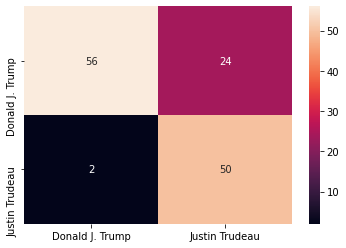

In [25]:
import seaborn as sb
g=sb.heatmap(cf_score,annot=True)
g.set_xticklabels(["Donald J. Trump","Justin Trudeau"])
g.set_yticklabels(["Donald J. Trump","Justin Trudeau"])

[Text(0, 0.5, 'Donald J. Trump'), Text(0, 1.5, 'Justin Trudeau')]

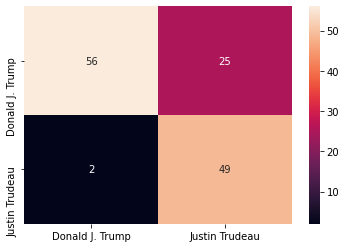

In [28]:
cfscore2=metrics.confusion_matrix(count_nb_pred,Y_test)
g=sb.heatmap(cfscore2,annot=True)
g.set_xticklabels(["Donald J. Trump","Justin Trudeau"])
g.set_yticklabels(["Donald J. Trump","Justin Trudeau"])

In [31]:
from sklearn.svm import LinearSVC
tfidf_sv=LinearSVC()

In [32]:
tfidf_sv.fit(tfidf_train,Y_train)

LinearSVC()

In [33]:
tfidf_svc_pred=tfidf_sv.predict(tfidf_test)

In [37]:
svmscore3=metrics.accuracy_score(tfidf_svc_pred,Y_test)
print("Linear SVM Score  ",round(svmscore3*100),2,"%")

Linear SVM Score   84 2 %


[Text(0, 0.5, 'Donald J. Trump'), Text(0, 1.5, 'Justin Trudeau')]

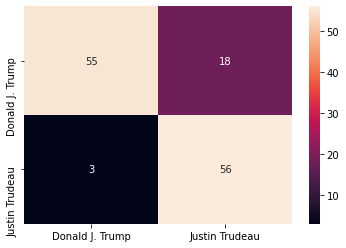

In [38]:
cfscore3=metrics.confusion_matrix(tfidf_svc_pred,Y_test)
g=sb.heatmap(cfscore3,annot=True)
g.set_xticklabels(["Donald J. Trump","Justin Trudeau"])
g.set_yticklabels(["Donald J. Trump","Justin Trudeau"])

In [40]:
from pprint import pprint
def plot_and_return_top_features(classifier, vectorizer, top_features=20):
    
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:top_features]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-top_features:]
    top_coefficients = np.hstack([topn_class1, topn_class2])
    if set(topn_class1).union(topn_class2):
        top_coefficients = topn_class1
        for ce in topn_class2:
            if ce not in topn_class1:
                top_coefficients.append(x)

    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in [tc[0] for tc in top_coefficients]]
    plt.bar(np.arange(len(top_coefficients)), [tc[0] for tc in top_coefficients], color=colors)
    plt.xticks(np.arange(len(top_coefficients)),
               [tc[1] for tc in top_coefficients], rotation=60, ha='right')
    plt.show()
    return top_coefficients

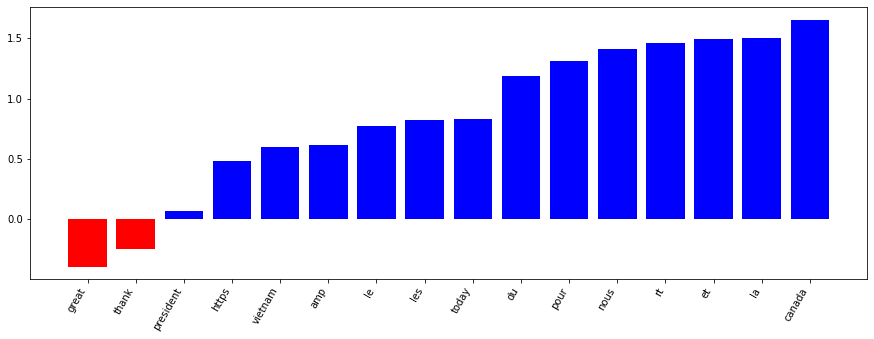

In [41]:
top_features=plot_and_return_top_features(tfidf_sv,tfidf)

In [44]:
trump_tweet="fake news"
trudeau_tweet='canada'
trump_tweet_vectorized=tfidf.transform([trump_tweet])
trudeau_tweet_vectorized=tfidf.transform([trudeau_tweet])


In [46]:
trump_tweet_pred=tfidf_sv.predict(trump_tweet_vectorized)
trudeau_tweet_pred=tfidf_sv.predict(trudeau_tweet_vectorized)

In [48]:
print("Predicted Trump Tweet ",trump_tweet_pred)
print("Predicted Trudeau Tweet",trudeau_tweet_pred)

Predicted Trump Tweet  ['Donald J. Trump']
Predicted Trudeau Tweet ['Justin Trudeau']
